# Data Science Test Widget Brain.

This assignment focuses on transshipments of a certain port. Each day, many vessels arrive in this port and are served by some stevedore(s). Four cargo types have been identified (ore, coal, oil, and petroleum), and vessels often carry a mixture of cargo types. For each unique vessel arrival (i.e. each row in the data), we would like a prediction of how much it transships (total of load & discharge activities) per cargo type. Variables of interest therefore are: discharge1, load1, discharge2, load2, discharge3, load3, discharge4 and load4. 

The data for this case is stored in ‘VesselData.csv’ and contains historical data. 

We would like you to provide us with a Jupyter notebook or Python script with the results of your endeavors, well enriched with comments elaborating on the steps taken, even if they did not lead you anywhere, and try to motivate your actions as much as possible. We would like to understand the approach you have taken and your line of thought.

Explanation of variables in the data:

| Variable | Explanation   |
|:-----|:-----|
|   eta  | Estimated time of arrival of vessel|
|  ata  | Actual time of arrival of vessel |
|atd	 |           Actual time of departure of vessel |
|vesseldwt|	    Vessel deadweight tonnage|
|vesseltype|	    Vessel type|
|discharge[x]|	Discharge amount of cargo type x|
|load[x]	  |      Load amount of cargo type x|
|stevedorenames|	(Anonymized) stevedore ID’s visited by vessel|
|hasnohamis	   | Boolean whether vessel has the HaMIS notification system|
|earliesteta|	    Estimated time of arrival of first entry to port|
|latesteta	 |   Estimated time of arrival of last entry to port (vessel can spread transshipment(s) over multiple days)|
|traveltype	  |  Travel type|
|previousportid|	ID of previous port|
|nextportid	   | ID of next port|
|isremarkable|	Boolean whether there is anything remarkable regarding the vessel|
|vesselid	  |  Vessel ID|

# Step 1. Import data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, median_absolute_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
raw_data = pd.read_csv('VesselData.csv')
# Check size
print(raw_data.shape)

(8208, 22)


In [3]:
# Look at data
raw_data

,eta,ata,atd,vesseldwt,vesseltype,discharge1,load1,discharge2,load2,discharge3,...,load4,stevedorenames,hasnohamis,earliesteta,latesteta,traveltype,previousportid,nextportid,isremarkable,vesselid
0,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,2017-09-22 00:00:00+00,109290.0,5,0,0,0,0,90173,...,0,Stevedore_104,NaN,2017-09-19 00:00:00+00,2017-09-19 00:00:00+00,ARRIVAL,981,731,f,2242
1,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,67170.0,3,0,0,0,0,0,...,0,Stevedore_109,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,19,15,f,5462
2,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,2017-10-01 00:00:00+00,67737.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-09-30 00:00:00+00,2017-09-30 00:00:00+00,ARRIVAL,19,19,f,5251
3,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-03 00:00:00+00,43600.0,3,0,0,0,0,0,...,0,Stevedore_57,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,15,18,f,5268
4,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,9231.0,3,0,0,0,0,0,...,0,Stevedore_98,NaN,2017-10-02 00:00:00+00,2017-10-02 00:00:00+00,ARRIVAL,74,27,f,5504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8203,2017-11-03 00:00:00+00,2017-11-03 00:00:00+00,2017-11-04 00:00:00+00,9587.0,3,0,0,0,0,0,...,0,Stevedore_64,NaN,2017-11-02 00:00:00+00,2017-11-03 00:00:00+00,ARRIVAL,5,19,f,5681
8204,2017-11-04 00:00:00+00,2017-11-04 00:00:00+00,2017-11-06 00:00:00+00,9654.0,3,0,0,0,0,0,...,0,"Stevedore_110,Stevedore_57,Stevedore_99,Steved...",NaN,2017-11-04 00:00:00+00,2017-11-05 00:00:00+00,SHIFT,391,102,f,4843
8205,2017-11-08 00:00:00+00,2017-11-07 00:00:00+00,2017-11-11 00:00:00+00,4726.0,5,0,0,0,0,0,...,3051,"Stevedore_89,Stevedore_79,Stevedore_75,Stevedo...",NaN,2017-11-07 00:00:00+00,2017-11-10 00:00:00+00,SHIFT,1043,19,f,3115
8206,2017-11-10 00:00:00+00,2017-11-10 00:00:00+00,2017-11-10 00:00:00+00,13320.0,3,0,0,0,0,0,...,0,Stevedore_46,NaN,2017-11-10 00:00:00+00,2017-11-10 00:00:00+00,ARRIVAL,54,71,f,4623


In [4]:
# Check columns
raw_data.columns

Index(['eta', 'ata', 'atd', 'vesseldwt', 'vesseltype', 'discharge1', 'load1',
       'discharge2', 'load2', 'discharge3', 'load3', 'discharge4', 'load4',
       'stevedorenames', 'hasnohamis', 'earliesteta', 'latesteta',
       'traveltype', 'previousportid', 'nextportid', 'isremarkable',
       'vesselid'],
      dtype='object')

In [5]:
# Taking a closer look at target vars
raw_data[['discharge1', 'load1','discharge2', 'load2', 'discharge3', 'load3', 'discharge4', 'load4']]

,discharge1,load1,discharge2,load2,discharge3,load3,discharge4,load4
0,0,0,0,0,90173,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8203,0,0,0,0,0,0,0,0
8204,0,0,0,0,0,0,0,0
8205,0,0,0,0,0,0,3537,3051
8206,0,0,0,0,0,0,0,0


Checking missing values.

In [6]:
# Per column
raw_data.isnull().sum()

eta                  0
ata                  0
atd                  0
vesseldwt            2
vesseltype           0
discharge1           0
load1                0
discharge2           0
load2                0
discharge3           0
load3                0
discharge4           0
load4                0
stevedorenames       2
hasnohamis        8208
earliesteta          0
latesteta            0
traveltype           0
previousportid       0
nextportid           0
isremarkable         0
vesselid             0
dtype: int64

In [7]:
# Remove hasnohamis as it's missing everywhere, remove rows with missing
data = raw_data.copy()
data = data.drop('hasnohamis', axis = 1)
data = data.dropna()
print(data.shape)
print(data.isnull().sum())

(8204, 21)
eta               0
ata               0
atd               0
vesseldwt         0
vesseltype        0
discharge1        0
load1             0
discharge2        0
load2             0
discharge3        0
load3             0
discharge4        0
load4             0
stevedorenames    0
earliesteta       0
latesteta         0
traveltype        0
previousportid    0
nextportid        0
isremarkable      0
vesselid          0
dtype: int64


First we need to calculate our target variable(s), which are the sums of the load and the discharge for each vessel and each category

In [8]:
# Manual
# data['transship_1'] = data['discharge1'] + data['load1']
# data['transship_2'] = data['discharge2'] + data['load2']
# data['transship_3'] = data['discharge3'] + data['load3']
# data['transship_4'] = data['discharge4'] + data['load4']

# Auto
for i in range(1,5):
    i = str(i)
    data['transship_' + i] =  data['discharge'+i] + data['load'+i]
    
data.columns

Index(['eta', 'ata', 'atd', 'vesseldwt', 'vesseltype', 'discharge1', 'load1',
       'discharge2', 'load2', 'discharge3', 'load3', 'discharge4', 'load4',
       'stevedorenames', 'earliesteta', 'latesteta', 'traveltype',
       'previousportid', 'nextportid', 'isremarkable', 'vesselid',
       'transship_1', 'transship_2', 'transship_3', 'transship_4'],
      dtype='object')

Visual inspection if it went alright.

In [9]:
targets = ['transship_1', 'transship_2', 'transship_3', 'transship_4']
data[['discharge1', 'load1','discharge2', 'load2', 'discharge3', 'load3', 'discharge4', 'load4']+targets].head(10)

,discharge1,load1,discharge2,load2,discharge3,load3,discharge4,load4,transship_1,transship_2,transship_3,transship_4
0,0,0,0,0,90173,0,0,0,0,0,90173,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,72741,0,0,0,0,0,0,0,72741,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,14044,0,0,0,0,0,14044,0
9,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# More inspection
data[targets].describe()

,transship_1,transship_2,transship_3,transship_4
count,8204.000000,8204.000000,8204.000000,8204.000000
mean,1785.306558,1188.665041,4838.435275,3325.864091
std,16343.301052,11351.391428,25890.594274,15763.734466
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,204304.000000,189933.000000,536978.000000,293449.000000


We also need to change some data types.

In [11]:
print(data.dtypes)
print(data.columns)

eta                object
ata                object
atd                object
vesseldwt         float64
vesseltype          int64
discharge1          int64
load1               int64
discharge2          int64
load2               int64
discharge3          int64
load3               int64
discharge4          int64
load4               int64
stevedorenames     object
earliesteta        object
latesteta          object
traveltype         object
previousportid      int64
nextportid          int64
isremarkable       object
vesselid            int64
transship_1         int64
transship_2         int64
transship_3         int64
transship_4         int64
dtype: object
Index(['eta', 'ata', 'atd', 'vesseldwt', 'vesseltype', 'discharge1', 'load1',
       'discharge2', 'load2', 'discharge3', 'load3', 'discharge4', 'load4',
       'stevedorenames', 'earliesteta', 'latesteta', 'traveltype',
       'previousportid', 'nextportid', 'isremarkable', 'vesselid',
       'transship_1', 'transship_2', 'transship_

In [12]:
time_vars = ['eta', 'ata', 'atd', 'earliesteta', 'latesteta']
cat_vars = ['vesseltype', 'stevedorenames', 'traveltype', 
            'previousportid', 'nextportid', 'isremarkable', 'vesselid']

data[time_vars] = pd.to_datetime(data[time_vars].stack()).unstack()
data[cat_vars] = data[cat_vars].astype(str)

# Step 2: Data analysis

Some thoughts:
- Vessel deadweight is probably one of the best predictors
- Type can be very indicative too
- Time can be indicative if some types are discharged at certain times
- atd-ata would be great predictor, but you do not have this info beforehand

I am thinking of a cross-sectional model, with vessel attributes as predictors. However, we might also simply take whatever a vessel transshipped before (look at vessel id). This means we might also have a model per ship (panel data-ish), and only use cross-sectional data for ships that are unknown to us.

Right now I am thinking of 4 seperate regression setups (because of time) but a multiple regression setup which incorporates relations between transshipmens of different types might be better.

Our test data should ideally be taking time into account, e.g. should be estimated on prior observations.

First we look at transshipments per vesseltype:

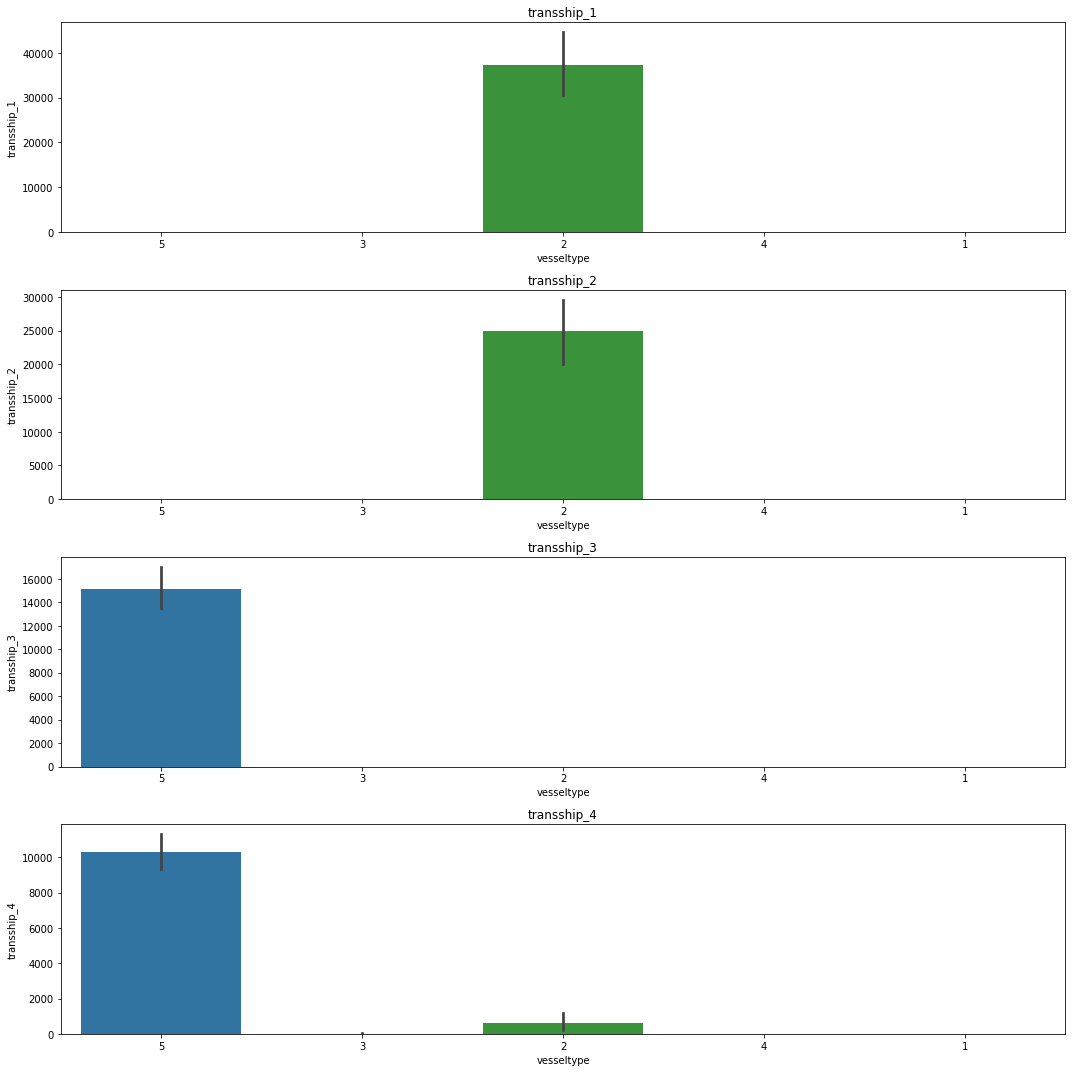

In [13]:
fig, axes = plt.subplots(nrows = 4, ncols=1, figsize=(15,15))
axes = axes.ravel()
target_cols = ['transship_1', 'transship_2', 'transship_3', 'transship_4']


for i, column in enumerate(target_cols):
    sns.barplot(x='vesseltype', y=column, data=data, ax=axes[i])
    axes[i].set_title(column)
    

plt.tight_layout()
plt.show()

- Transship 1 and 2 are only performed by vesseltype 2
- Transship 3 and 4 are almost only performed by vesseltype 5
- Vesseltype 1 and 4 do not seem to transship anything
- **This might be implemented by heuristic rules (on top of the model)**

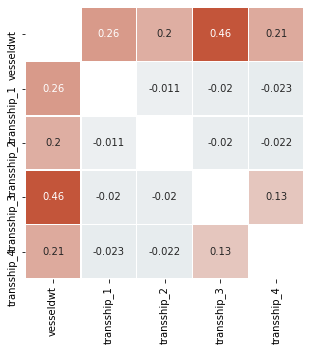

In [14]:
# Next we look at correlation between our deadweight and our target vars
cont_vars = ['vesseldwt'] + target_cols
corr_matrix = data[cont_vars].corr()
plt.figure(figsize = (5, 5))
size = len(cont_vars)
mask = np.diag([1]*size)
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, annot = True, cbar = False, cmap=cmap, 
            linewidths=.5, center=0, mask=mask)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top 
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values plt.show()
plt.show()

Decent positive correlation Especially type 4 seems to weight a lot?

Lastly we look at the mean transshipments per vesselid.

In [15]:
per_id = data.groupby('vesselid')[target_cols].mean()
per_id

,transship_1,transship_2,transship_3,transship_4
vesselid,,,,
10,0.0,0.0,0.0,0.0
1010,0.0,51519.0,0.0,0.0
1013,0.0,50662.0,0.0,0.0
1017,0.0,59818.0,0.0,0.0
1018,0.0,0.0,0.0,0.0
...,...,...,...,...
958,178159.5,0.0,0.0,0.0
965,0.0,0.0,0.0,0.0
968,0.0,0.0,0.0,3522.5


In [16]:
data.groupby('vesselid')['vesselid'].count().sort_values()

vesselid
6873     1
4054     1
6715     1
6716     1
4049     1
        ..
5505    59
5504    65
4596    79
4685    94
4684    98
Name: vesselid, Length: 3021, dtype: int64

Some vessels return quite often (almost 100 times). For these vessels I would perhaps not rely on a simple cross sectional model, but instead focus more heavily on prior observations for this vessel. Maybe some sort of Bayesian/mixed approach, where the strength of the prior depends on the number of observations you have for a vessel might be appropriate.

Also panel data setups (dummy per id + time series component) might work here (thinking out loud here).

# Step 3: Model
Normally I'd spend (much) more time analyzing the data, but I guess a DS case is no DS case without a model. It will be (very) suboptimal though,

What variables I'd like to add:
- vesselknown (dummy)
- last_transship_x (amount of last transshipment of type x)
- No transship_x (dummy if above var is zero

I have no time to engineer these features right now, so I'll simply use:  
- `vesseldwt`
- `vesseltype`

I'll also focus on transshipment of type 4 for now for now, but the process for the others is the same.

In [17]:
data_model = data.copy()[['ata', 'vesseldwt', 'vesseltype', 'transship_4']]
data_model

,ata,vesseldwt,vesseltype,transship_4
0,2017-09-19 00:00:00+00:00,109290.0,5,0
1,2017-10-02 00:00:00+00:00,67170.0,3,0
2,2017-09-30 00:00:00+00:00,67737.0,3,0
3,2017-10-02 00:00:00+00:00,43600.0,3,0
4,2017-10-02 00:00:00+00:00,9231.0,3,0
...,...,...,...,...
8203,2017-11-03 00:00:00+00:00,9587.0,3,0
8204,2017-11-04 00:00:00+00:00,9654.0,3,0
8205,2017-11-07 00:00:00+00:00,4726.0,5,6588
8206,2017-11-10 00:00:00+00:00,13320.0,3,0


We need to create dummies for the vessel type.

In [18]:
# Function for adding dummies
def add_dummies(df, cat_vars): 
    for var in cat_vars:
        dummy_df = pd.get_dummies(df[var], prefix = var, drop_first = True) 
        df = df.drop(var, 1)
        df_new = pd.concat([df, dummy_df], axis=1)
        df = df_new
    return(df)

data_model = add_dummies(data_model, ['vesseltype'])
data_model

,ata,vesseldwt,transship_4,vesseltype_2,vesseltype_3,vesseltype_4,vesseltype_5
0,2017-09-19 00:00:00+00:00,109290.0,0,0,0,0,1
1,2017-10-02 00:00:00+00:00,67170.0,0,0,1,0,0
2,2017-09-30 00:00:00+00:00,67737.0,0,0,1,0,0
3,2017-10-02 00:00:00+00:00,43600.0,0,0,1,0,0
4,2017-10-02 00:00:00+00:00,9231.0,0,0,1,0,0
...,...,...,...,...,...,...,...
8203,2017-11-03 00:00:00+00:00,9587.0,0,0,1,0,0
8204,2017-11-04 00:00:00+00:00,9654.0,0,0,1,0,0
8205,2017-11-07 00:00:00+00:00,4726.0,6588,0,0,0,1
8206,2017-11-10 00:00:00+00:00,13320.0,0,0,1,0,0


In [19]:
# Split in X and y
mask = data_model['ata'] < datetime(2017, 10, 1, 0, 0, 0, 0, pytz.UTC)
x_cols = ['vesseldwt', 'vesseltype_2', 'vesseltype_3', 'vesseltype_4', 'vesseltype_5']
X_train = data_model.loc[mask, x_cols]
X_test = data_model.loc[~mask, x_cols]
y_train = data_model.loc[mask, 'transship_4']
y_test = data_model.loc[~mask, 'transship_4']

print(X_train.shape)
print(X_test.shape)

(6679, 5)
(1525, 5)


Simple linear regression model

In [20]:
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

Evaluate

In [21]:
def regression_report(y_true, y_pred):
    
    error = y_true - y_pred
    percentil = [5,25,50,75,95]
    percentil_value = np.percentile(error, percentil)
    
    metrics = [
        ('mean absolute error', mean_absolute_error(y_true, y_pred)),
        ('median absolute error', median_absolute_error(y_true, y_pred)),
        ('mean squared error', mean_squared_error(y_true, y_pred)),
        ('max error', max_error(y_true, y_pred)),
        ('r2 score', r2_score(y_true, y_pred)),
        ('explained variance score', explained_variance_score(y_true, y_pred))
    ]
    
    print('Metrics for regression:')
    for metric_name, metric_value in metrics:
        print(f'{metric_name:>25s}: {metric_value: >20.3f}')
        
    print('\nPercentiles:')
    for p, pv in zip(percentil, percentil_value):
        print(f'{p: 25d}: {pv:>20.3f}')
        
regression_report(y_test, y_pred)

Metrics for regression:
      mean absolute error:             6282.543
    median absolute error:             2110.957
       mean squared error:        188713763.727
                max error:           248999.212
                 r2 score:                0.121
 explained variance score:                0.123

Percentiles:
                        5:           -11715.684
                       25:            -8148.579
                       50:             1096.579
                       75:             1722.644
                       95:             6721.377


**FINAL WORDS**: Had no time to check my model. But this notebook should illustrate my initial approach for this problem. I expect some errors throughout the notebook...